In [1]:
#pip install wordcloud

In [1]:
import os
print(os.path.isdir("Dataset"))


False


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Corona_NLP_train.csv to Corona_NLP_train (1).csv


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

In [5]:
# # Configure plots
# sns.set(style="whitegrid")
# %matplotlib inline

# # Load Data
# data_path = "Dataset/Corona_NLP_train.csv"
# df = pd.read_csv(data_path, encoding='ISO-8859-1')  # Use the appropriate encoding
#df = pd.read_csv("C:/Users/נעמה/Desktop/שנה ג סמסטר ב/deep learning/Corona_NLP_train.csv",encoding='ISO-8859-1')


In [4]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')

In [5]:
# Slice for only the first 1000 samples
#df = df.head(1000)
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
import pandas as pd

# Make sure long strings don't get cut off in the display
pd.set_option('display.max_colwidth', None)

# Load your dataset (use the correct encoding!)
df = pd.read_csv("Corona_NLP_train.csv", encoding='ISO-8859-1')

# Show only the tweet and its sentiment
import re


# Function to clean a single tweet
def clean_text(text):
    text = text.replace('\r', ' ').replace('\n', ' ')  # remove line breaks
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#', '', text)  # removes just the '#' symbol
    text = re.sub(r'\s+', ' ', text).strip()  # clean up whitespace
    return text

# Apply cleaning function
df['CleanTweet'] = df['OriginalTweet'].apply(clean_text)
df = df[df['CleanTweet'].str.strip() != '']

# def clean_text(text):
#     text = re.sub(r"http\S+|www.\S+", "", text)       # Remove URLs
#     text = re.sub(r"@\w+", "", text)                  # Remove mentions
#     return text.strip()

# df['CleanTweet'] = df['OriginalTweet'].apply(clean_text)

df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak"
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty... PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. Stay calm, stay safe. COVID19france COVID_19 COVID19 coronavirus confinement Confinementotal ConfinementGeneral"
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the COVID19 outbreak. Not because I'm paranoid, but because my food stock is litteraly empty. The coronavirus is a serious thing, but please, don't panic. It causes shortage... CoronavirusFrance restezchezvous StayAtHome confinement"
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral,Airline pilots offering to stock supermarket shelves in NZ lockdown COVID-19
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive,"You know itÂs getting tough when is rationing toilet paper coronavirus toiletpaper martinsville, help us out!!"
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral,Is it wrong that the smell of hand sanitizer is starting to turn me on? coronavirus COVID19 coronavirus


Data Shape: (41143, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41143 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41143 non-null  int64 
 1   ScreenName     41143 non-null  int64 
 2   Location       32559 non-null  object
 3   TweetAt        41143 non-null  object
 4   OriginalTweet  41143 non-null  object
 5   Sentiment      41143 non-null  object
 6   CleanTweet     41143 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.5+ MB
None

Missing Values:
UserName            0
ScreenName          0
Location         8584
TweetAt             0
OriginalTweet       0
Sentiment           0
CleanTweet          0
dtype: int64


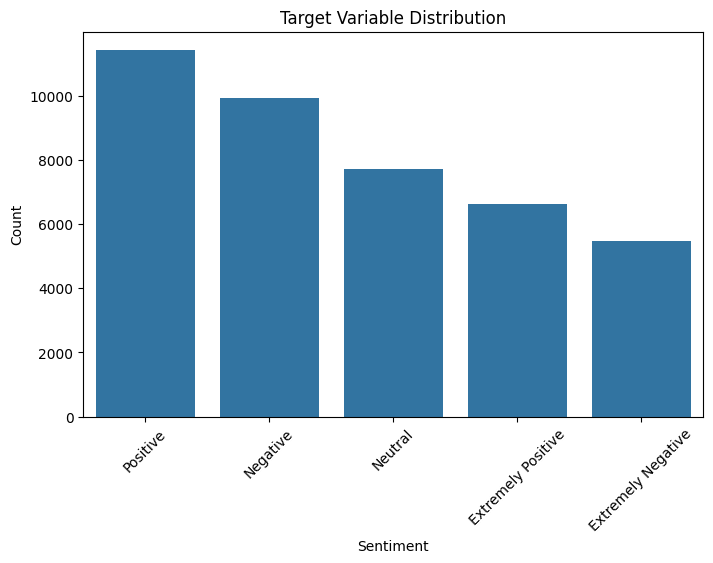

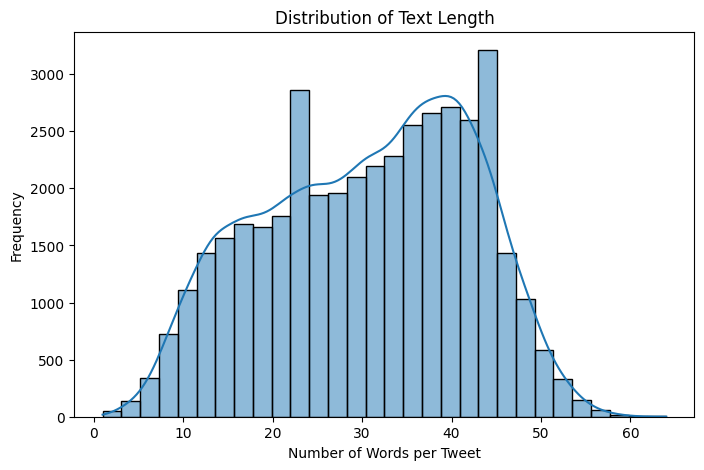

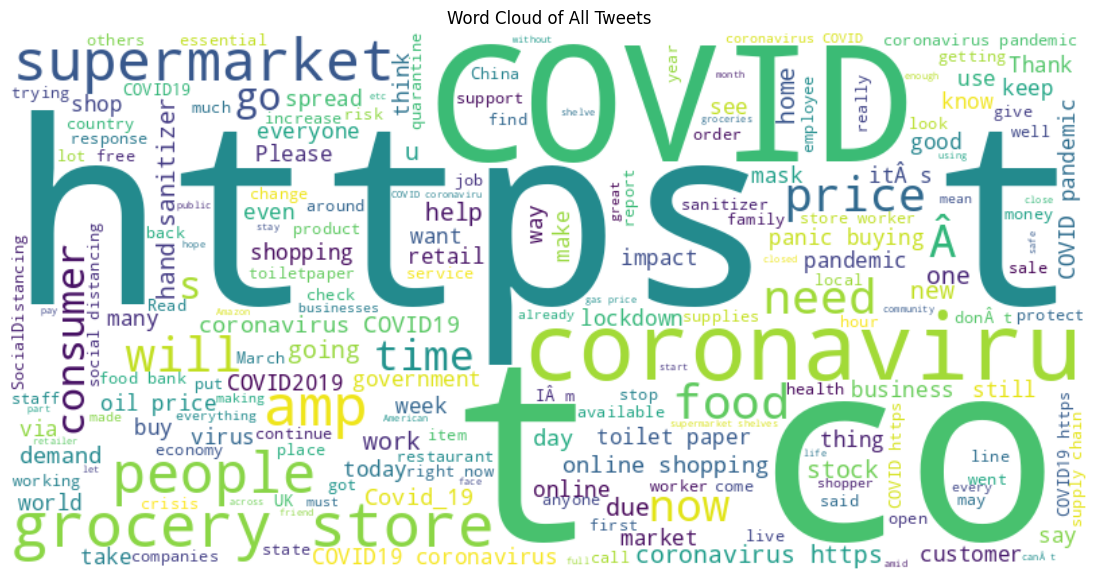

In [7]:
# Basic Data Overview
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title("Target Variable Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Text Length Analysis
df['Text_Length'] = df['OriginalTweet'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words per Tweet")
plt.ylabel("Frequency")
plt.show()

# Word Cloud
all_text = " ".join(df['OriginalTweet'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()



# check if there is connection between sentiment and time

<ipython-input-8-2545296877>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


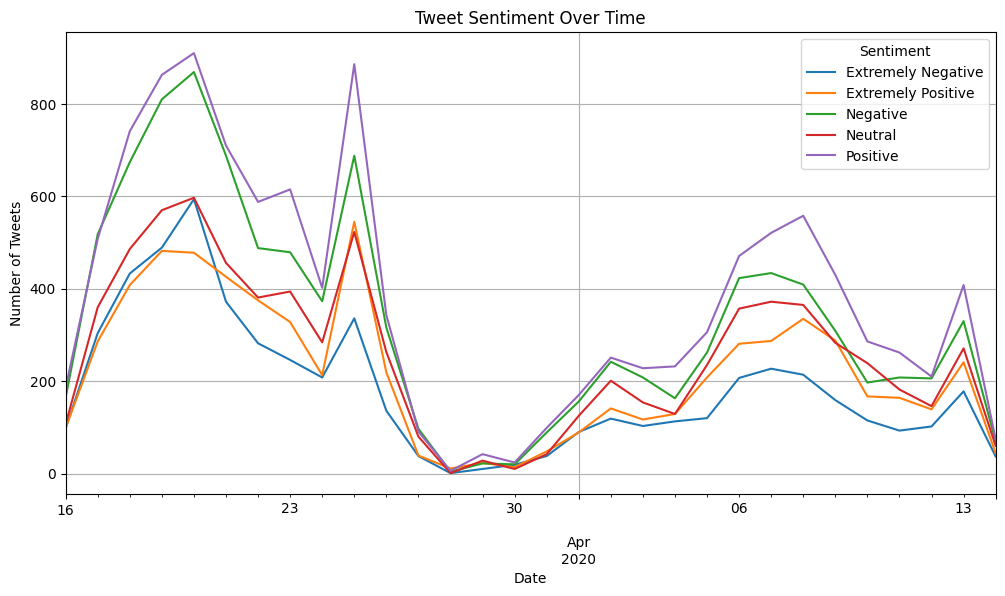

In [8]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])
# Group by date and sentiment
sentiment_counts = df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0)

# Plot
sentiment_counts.plot(figsize=(12, 6))
plt.title("Tweet Sentiment Over Time")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.grid(True)
plt.show()

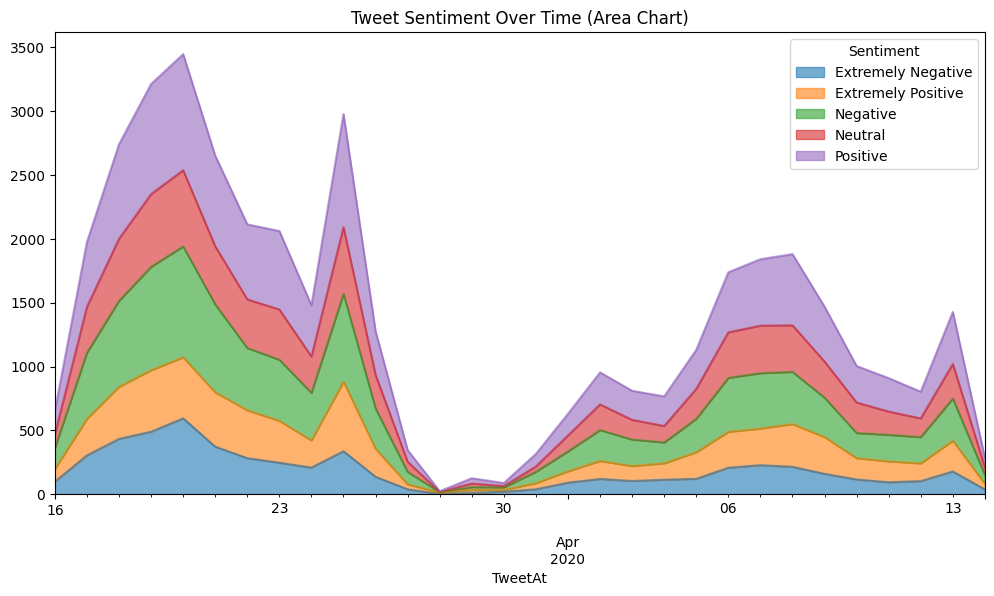

In [9]:
sentiment_counts.plot.area(figsize=(12,6), alpha=0.6)
plt.title("Tweet Sentiment Over Time (Area Chart)")
plt.show()


<Figure size 1200x600 with 0 Axes>

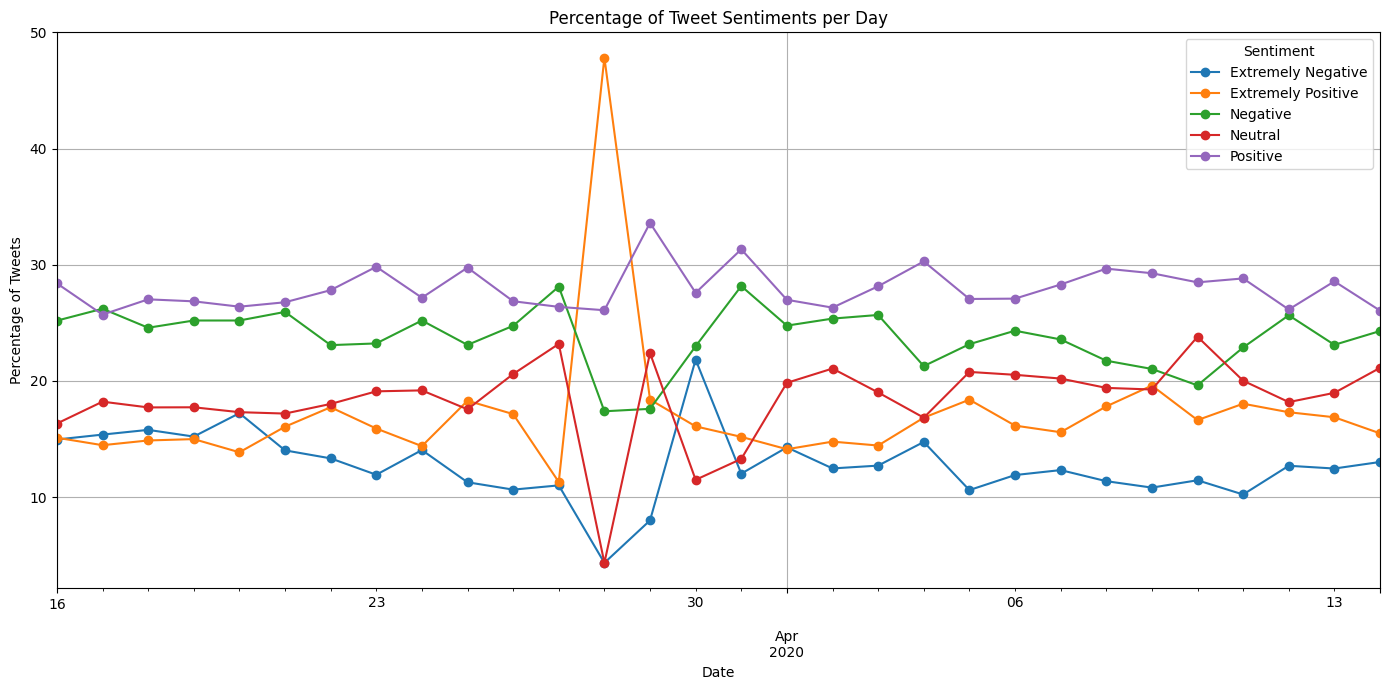

In [10]:
daily_counts = df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0)

# Step 2: Convert to percentage (row-wise division)
daily_percentages = daily_counts.div(daily_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot
plt.figure(figsize=(12, 6))
daily_percentages.plot(kind='line', figsize=(14, 7), marker='o')
plt.title("Percentage of Tweet Sentiments per Day")
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Find the date with the highest 'Extremely Positive' sentiment
peak_date = daily_percentages['Extremely Positive'].idxmax()
peak_percentage = daily_percentages['Extremely Positive'].max()

print("Date with peak 'Extremely Positive' sentiment:", peak_date)
print("Percentage on that date:", round(peak_percentage, 2), "%")


Date with peak 'Extremely Positive' sentiment: 2020-03-28 00:00:00
Percentage on that date: 47.83 %


In [12]:
print("Date range:", df['TweetAt'].min(), "to", df['TweetAt'].max())


Date range: 2020-03-16 00:00:00 to 2020-04-14 00:00:00


In [13]:
# Filter the dataframe for the peak date
peak_day_tweets = df[df['TweetAt'] == peak_date]

# Display tweets with 'Extremely Positive' sentiment
#peak_extremely_positive = peak_day_tweets[peak_day_tweets['Sentiment'] == 'Extremely Positive']

# Show the text of those tweets
peak_day_tweets[['OriginalTweet', 'Sentiment']].head(10)  # or use .to_string(index=False) for full text


,OriginalTweet,Sentiment
24948,.@Woolworths is set to expand its community shopping hour amid a number of social distancing measures. The supermarket giant will now devote an hour from 7am on Tuesdays and Thursdays for emergency services and healthcare workers. https://t.co/MlW1GFkZNa #Coronavirus #7NEWS https://t.co/2HPxMWgKPO,Positive
24949,"@JackPosobiec Test kits with low accuracy but high prices, businessmen in the world should learn from CCP?\r\r\nMaking big money with #coronavirus made by CCP itself https://t.co/TxTXT1Yr3q",Negative
24950,"NSW, Australia. COVID-19 positive Chinese woman caught on camera spitting on bananas at a suburban supermarket. Is this an isolated incident or are the Chinese Nationals and Communist Party loyalists being paid and instructed to do this by their government? https://t.co/9fXVVZdGpC",Extremely Positive
24951,1 A friend is helping with relief across India wants connects to Spencer s Le Marche Modern Bazaar D mart Bigmart Retail More Nilgiris Spar Easy Day Star Bazaar Hyper City Lulu Hypermarket Vishal Mega Mart Best Price Heritage Fresh,Extremely Positive
24952,"My story about how grocery stores and their workers are continuing their vital services during the #coronavirus pandemic. Remember to be kind to supermarket workers, theyÂre working for low wages to feed you during a global crisis. ?@seacoastonline? https://t.co/tYiG6QcOiK",Negative
24953,"Protected shopping with my wife during the #CoronaPandemie, thanks to @manomama's @urbandoo_online Loop.\r\r\n#StaySafe #StayHealthy ?? #SocialDistanacing #Coronavirus #COVID19 #SocialDistanacing #MaskeAuf https://t.co/CPYkbOEKvt https://t.co/xMnoN0RXJr",Extremely Positive
24954,"#Coronavirus: Italy becoming impatient with lockdown - and social unrest is brewing. Police descend on a supermarket after reports people have stolen food to feed themselves, as patience turns to desperation https://t.co/YQnhqamNgs",Extremely Negative
24955,@mundaditob @marosephine @senatrdc @VoilaNight @PresidenceRdc I can confirm it and backup this statement because before the occuring of #covid-19 and now prices are still the same. Go ahead #Shoprite you are the BEST!,Extremely Positive
24956,"So you want to limit trips to the grocery store?\r\r\nMe too!\r\r\n\r\r\nDYK: Unopened blocks of #cheese like this \r\r\nwill keep for up to 6 months in fridge.\r\r\n\r\r\nUse in quesadillas, quiche, soup, tacos - what else?\r\r\n\r\r\n#COVID19 #Covid_19 #COVIDCanada #panickbuying \r\r\n#quarantinekitchen #QuarantineCooking https://t.co/91DbaoUuWh",Positive
24957,"When all this is over, IÂll never again take for granted a handshake with a stranger or a hug from a friend. I will appreciate full shelves at the supermarket &amp; pharmacy. I will be grateful for live sport &amp; appreciate the roar of the crowds in the stadiums. #coronavirus #Covid_19",Extremely Positive


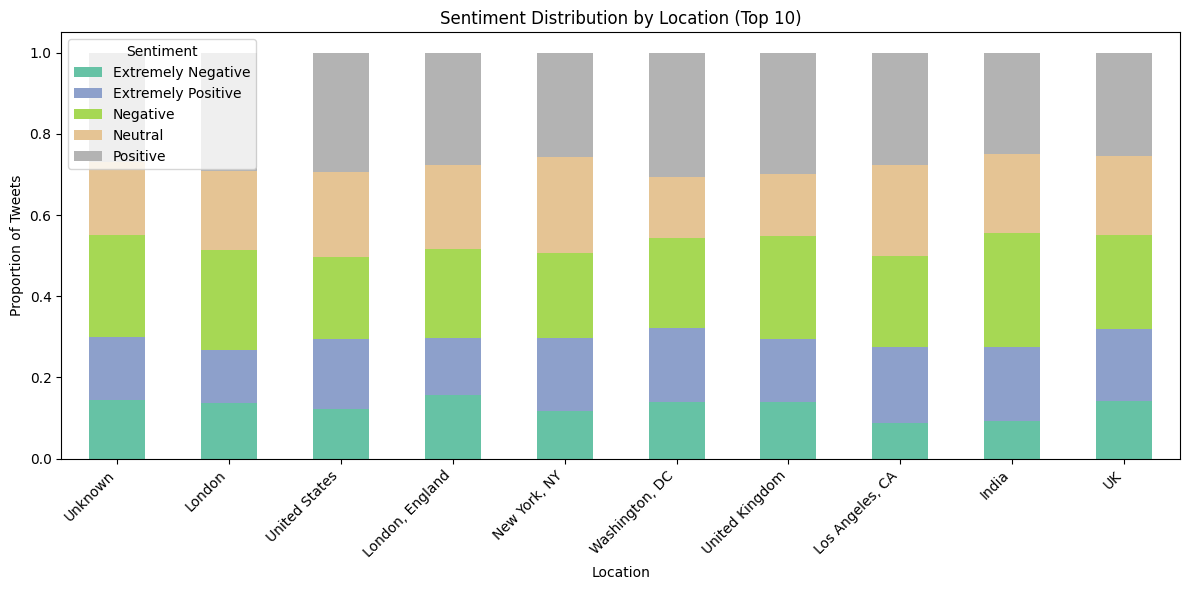

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Replace NaNs
df['Location'] = df['Location'].fillna("Unknown")

# Step 2: Count sentiment per location
location_sentiment_counts = df.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)

# Step 3: Normalize to get percentages per location
location_sentiment_percent = location_sentiment_counts.div(location_sentiment_counts.sum(axis=1), axis=0)

# Optional: focus on top 10 locations with most tweets
top_locations = location_sentiment_counts.sum(axis=1).sort_values(ascending=False).head(10).index
location_sentiment_percent = location_sentiment_percent.loc[top_locations]

# Step 4: Plot
location_sentiment_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Sentiment Distribution by Location (Top 10)")
plt.ylabel("Proportion of Tweets")
plt.xlabel("Location")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


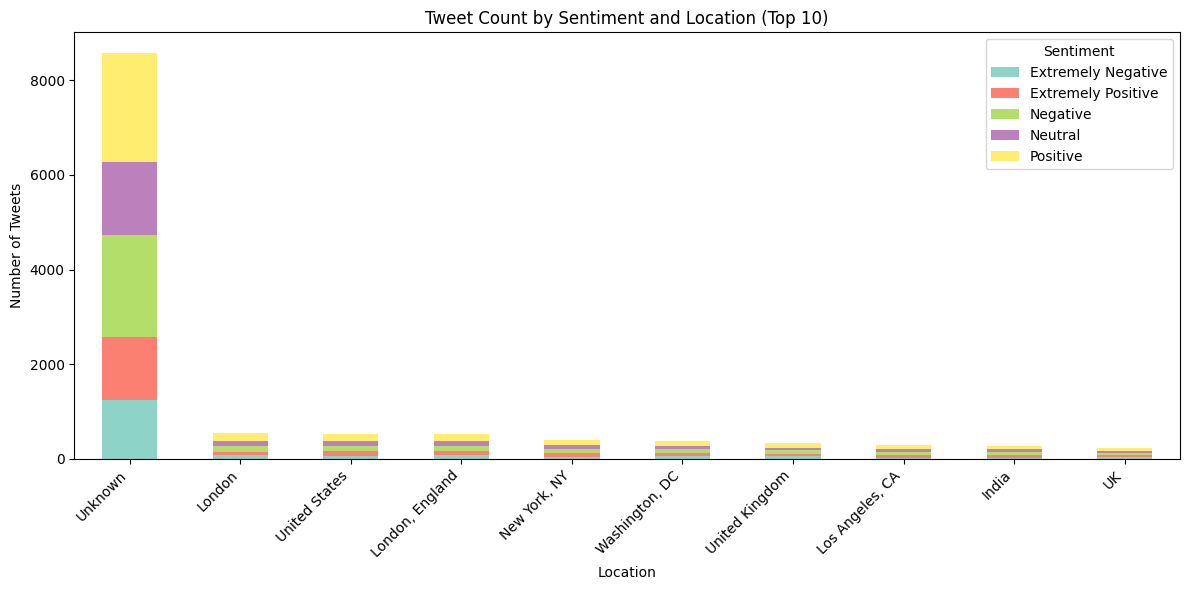

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace NaNs with 'Unknown'
df['Location'] = df['Location'].fillna("Unknown")

# Count number of tweets per sentiment per location
location_sentiment_counts = df.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)

# Optional: limit to top 10 locations with most tweets
top_locations = location_sentiment_counts.sum(axis=1).sort_values(ascending=False).head(10).index
location_sentiment_top = location_sentiment_counts.loc[top_locations]

# Plot
location_sentiment_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Tweet Count by Sentiment and Location (Top 10)")
plt.ylabel("Number of Tweets")
plt.xlabel("Location")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
# Fill missing locations
df['Location'] = df['Location'].fillna("Unknown")

# Count tweets per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'TweetCount']

# Display the table
location_counts


,Location,TweetCount
0,Unknown,8587
1,London,540
2,United States,526
3,"London, England",520
4,"New York, NY",395
...,...,...
12211,Round Earth,1
12212,Uganda Kampala,1
12213,Views don't reflect employers,1
12214,"Charlotte, MI",1


In [17]:
df[df["Location"] == "i love you so much || he/him"]


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanTweet,Text_Length
41156,44955,89907,i love you so much || he/him,2020-04-14,@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe,Negative,Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe,46


Data Shape: (41143, 8)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41143 entries, 0 to 41156
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41143 non-null  int64         
 1   ScreenName     41143 non-null  int64         
 2   Location       41143 non-null  object        
 3   TweetAt        41143 non-null  datetime64[ns]
 4   OriginalTweet  41143 non-null  object        
 5   Sentiment      41143 non-null  object        
 6   CleanTweet     41143 non-null  object        
 7   Text_Length    41143 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.8+ MB
None

Missing Values:
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
CleanTweet       0
Text_Length      0
dtype: int64


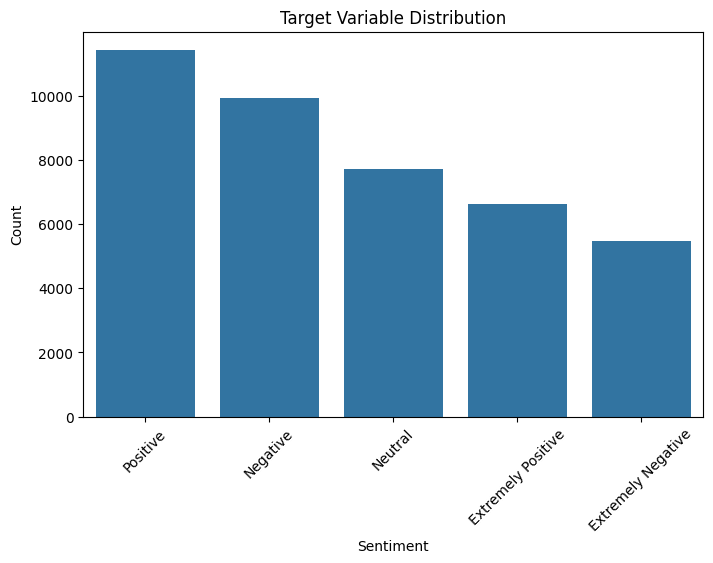

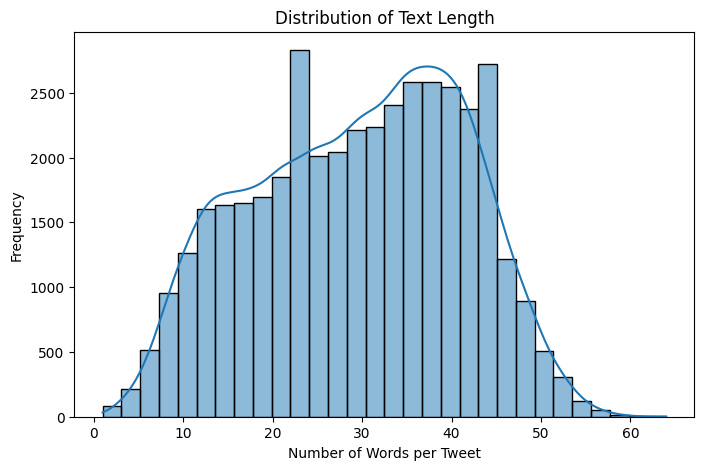

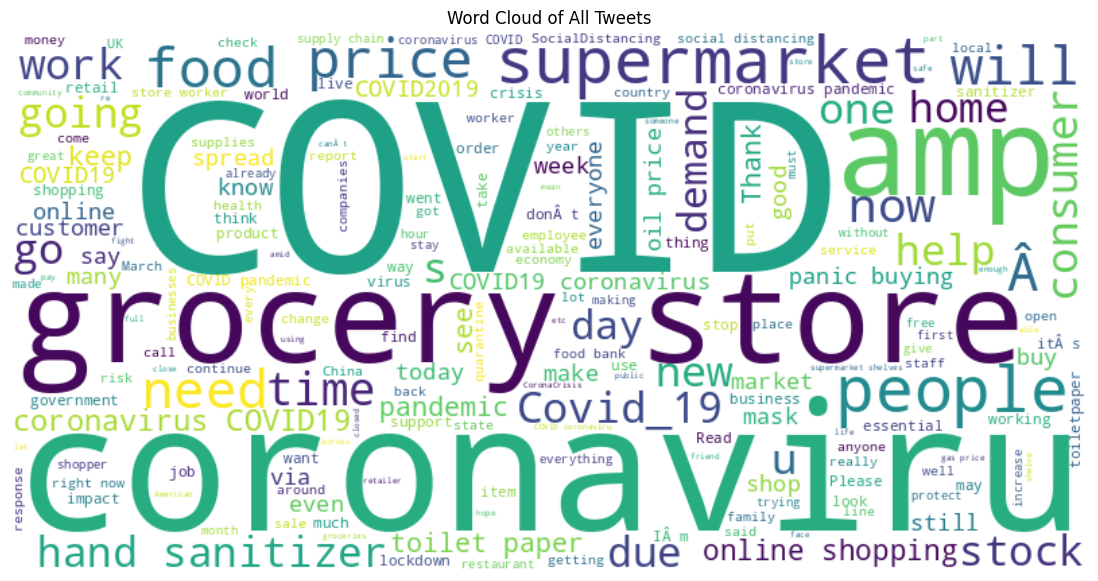

In [18]:
# Basic Data Overview for the clean tweets
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title("Target Variable Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Text Length Analysis
df['Text_Length'] = df['CleanTweet'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words per Tweet")
plt.ylabel("Frequency")
plt.show()

# Word Cloud
all_text = " ".join(df['CleanTweet'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

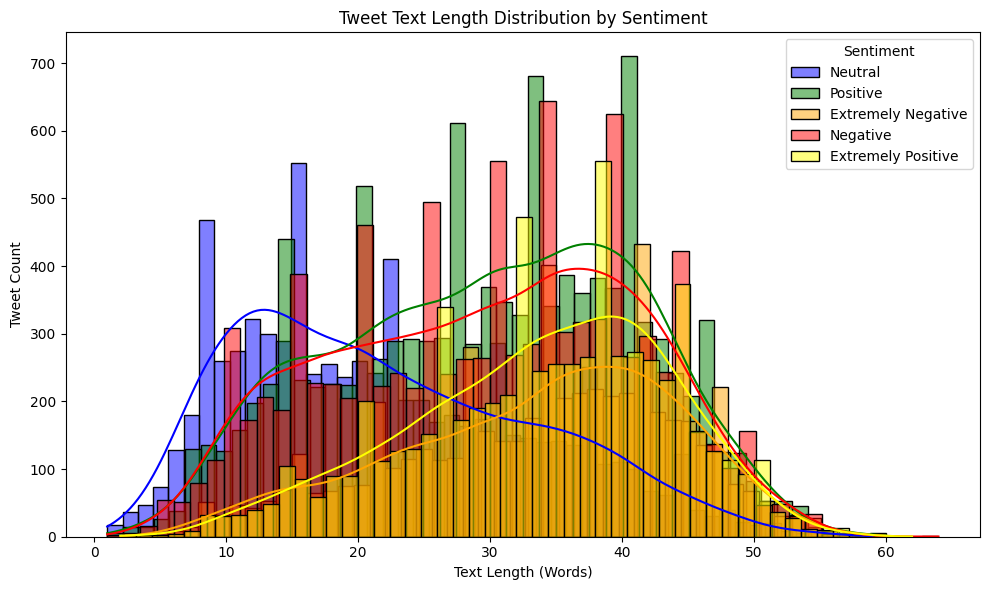

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute text length
df['text_length'] = df['CleanTweet'].apply(lambda x: len(str(x).split()))

# Optional: filter very long tweets
#df_filtered = df[df['text_length'] < 100]

# Plot
plt.figure(figsize=(10, 6))

# Plot each sentiment manually
sentiments = df['Sentiment'].unique()
colors = ['blue', 'green', 'orange',"red","yellow"]

for sentiment, color in zip(sentiments, colors):
    sns.histplot(
        df[df['Sentiment'] == sentiment]['text_length'],
        bins=50,
        kde=True,
        color=color,
        label=sentiment,
        stat='count',
        alpha=0.5
    )

# Add legend manually (now guaranteed to work)
plt.legend(title='Sentiment')
plt.title('Tweet Text Length Distribution by Sentiment')
plt.xlabel('Text Length (Words)')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()


nutral tweet tend to be shorter while the one with sentiment is somhow the same.

# train the model for the fisrt time just to check

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5).to(device)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5,
    ignore_mismatched_sizes=True
).to(device)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN thi

In [21]:
#change the labels to numbers instead of str
label2id = {
    "Extremely Negative": 0,
    "Negative": 1,
    "Neutral": 2,
    "Positive": 3,
    "Extremely Positive": 4
}

id2label = {v: k for k, v in label2id.items()}  # Optional: to decode predictions later
df['sentiment'] = df['Sentiment'].map(label2id)

# Split into train (70%) and temp (30%)
train_df, temp_df = train_test_split(df, test_size= 0.3, random_state=42, stratify=df['sentiment'])
# Further split temp into test (20%) and eval (10%)
test_df, eval_df = train_test_split(temp_df, test_size=1/3, random_state=42, stratify=temp_df['sentiment'])
# Keep the required columns
train_df = train_df[['CleanTweet', 'sentiment']]
test_df = test_df[['CleanTweet', 'sentiment']]
eval_df = eval_df[['CleanTweet', 'sentiment']]
# Save (current directory)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
eval_df.to_csv('eval_data.csv', index=False)
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanTweet,Text_Length,text_length,sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and,2,2,2
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,38,38,3
2,3801,48753,Vagabonds,2020-03-16,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak",13,13,3
3,3802,48754,Unknown,2020-03-16,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,"My food stock is not the only one which is empty... PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. Stay calm, stay safe. COVID19france COVID_19 COVID19 coronavirus confinement Confinementotal ConfinementGeneral",41,41,3
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,"Me, ready to go at supermarket during the COVID19 outbreak. Not because I'm paranoid, but because my food stock is litteraly empty. The coronavirus is a serious thing, but please, don't panic. It causes shortage... CoronavirusFrance restezchezvous StayAtHome confinement",39,39,0
...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral,Airline pilots offering to stock supermarket shelves in NZ lockdown COVID-19,11,11,2
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,23,23,0
41154,44953,89905,Unknown,2020-04-14,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive,"You know itÂs getting tough when is rationing toilet paper coronavirus toiletpaper martinsville, help us out!!",16,16,3
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral,Is it wrong that the smell of hand sanitizer is starting to turn me on? coronavirus COVID19 coronavirus,18,18,2


In [22]:
#create class for the tweets dataset
class tweets_corona(Dataset): # Dataset Class
    def __init__(self, dataframe, tokenizer):
        # Extract the 'text_combined' and 'label' columns from the DataFrame
        self.texts = dataframe['CleanTweet'].tolist()
        self.labels = dataframe['sentiment'].tolist()
        self.tokenizer = tokenizer # Tokenizer for text processing
    def __len__(self): #Returns the total number of samples in the dataset.
        # This method is required for PyTorch's DataLoader to work !
        return len(self.texts)
    def __getitem__(self, idx): #Retrieves a single data sample and its label at the specified index.
        text = self.texts[idx]
        label = self.labels[idx]
        # Tokenize the text using the provided tokenizer
        encoding = self.tokenizer(text,
                                  padding='max_length', # Add padding to reach the maximum length
             truncation=True, # Trim if the text is longer than max_length
            max_length=32, # Maximum sequence length allowed
            return_tensors='pt')
        return { # Return a dictionary containing tokenized inputs, attention masks, and the label
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)}

In [25]:
#functions for the training
def early_stop_check(patience, best_val_accuracy, best_val_accuracy_epoch, current_val_accuracy, current_val_accuracy_epoch):
    early_stop_flag = False
    if current_val_accuracy > best_val_accuracy:
        best_val_accuracy = current_val_accuracy
        best_val_accuracy_epoch = current_val_accuracy_epoch
    else:
        if current_val_accuracy_epoch - best_val_accuracy_epoch > patience:
            early_stop_flag = True
    return best_val_accuracy, best_val_accuracy_epoch, early_stop_flag




In [23]:
!pip install optuna

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import optuna
import wandb
from transformers import RobertaTokenizer, RobertaForSequenceClassification

In [28]:
#traning loop
def train_model_with_hyperparams(model, train_loader, val_loader, optimizer, criterion, epochs, patience, trial):
    best_val_accuracy = 0.0
    best_val_accuracy_epoch = 0
    early_stop_flag = False
    best_model_state = None
    for epoch in range(1, epochs + 1):
        model.train() # Enable training mode
        train_loss = 0.0
        total_train_samples = 0
        correct_train_predictions = 0
        for batch in train_loader: #Iterates over the train_loader, which is a DataLoader object containing batches of training data.
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            optimizer.zero_grad() # Reset gradients
            outputs = model(input_ids, attention_mask=attention_mask)
# Forward pass
            logits = outputs.logits # save the logits (the raw output of the model)
            loss = criterion(logits, labels) # Calculate loss
            loss.backward() # Backward pass
            optimizer.step() # Update weights using the optimizer
            # Accumulate training loss and predictions
            train_loss += loss.item() * input_ids.size(0)
            total_train_samples += input_ids.size(0)
            correct_train_predictions += (logits.argmax(dim=1) == labels).sum().item()
        train_loss /= total_train_samples
        train_accuracy = correct_train_predictions / total_train_samples
        ###  Validation loop  ###
        model.eval() # Enable evaluation mode
        val_loss = 0.0
        total_val_samples = 0
        correct_val_predictions = 0
        all_val_labels = []
        all_val_preds = []
        with torch.no_grad(): # Disable gradient computation
            for batch in val_loader: # iterate on the val_loader's batches
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                loss = criterion(logits, labels)
                val_loss += loss.item() * input_ids.size(0)
                total_val_samples += input_ids.size(0)
                correct_val_predictions += (logits.argmax(dim=1) == labels).sum().item()
                all_val_labels.extend(labels.cpu().numpy())
                all_val_preds.extend(logits.argmax(dim=1).cpu().numpy())
        # calculate metrics
        val_loss /= total_val_samples
        val_accuracy = correct_val_predictions / total_val_samples
        val_precision = precision_score(all_val_labels, all_val_preds, average='weighted')
        val_recall = recall_score(all_val_labels, all_val_preds, average='weighted')
        val_f1 = f1_score(all_val_labels, all_val_preds, average='weighted')

        # Check for early stopping
        best_val_accuracy, best_val_accuracy_epoch, early_stop_flag = early_stop_check(patience, best_val_accuracy, best_val_accuracy_epoch, val_accuracy, epoch)
        # Save the best model under the best_model_state parameter
        if val_accuracy == best_val_accuracy:
            best_model_state = model.state_dict()
        # Log metrics to Weights & Biases - THIS IS WHERE WE TRACK THE RESULTS AND THE PROCESS
        print(f"Logging epoch {epoch}: Train Acc = {train_accuracy}, Val Acc = {val_accuracy}")
        wandb.log({ #log == logging of the training process (e.g. results) - will be done each epoch
            "Epoch": epoch,
            "Train Loss": train_loss,
            "Train Accuracy": train_accuracy,
            "Validation Loss": val_loss,
            "Validation Accuracy": val_accuracy,
            "Validation Precision": val_precision,
            "Validation Recall": val_recall,
            "Validation F1": val_f1})
        if early_stop_flag:  # Checks whether the early stopping condition has been met, as indicated by the early_stop_flag
            break# Exits the training loop immediately if the early stopping condition is satisfied
    if best_model_state is not None: # Save the best model as a .pt file
        torch.save(best_model_state, f"best_model_trial_{trial.number}.pt")
    return best_val_accuracy

In [29]:
# Objective Function for Optuna
def objective(trial):
    # Hyperparameter suggestions
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-6, 1e4)
    patience = trial.suggest_int("patience", 7, 10)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    num_layers = trial.suggest_int("num_layers", 1, 3)
    train_dataset = tweets_corona(train_df, RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')) # Create the tweets_corona object
    val_dataset = tweets_corona(eval_df, RobertaTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')) # Create the tweets_corona object
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # insert into a DataLoader
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) # insert into a DataLoader
    model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment",num_labels=5,ignore_mismatched_sizes=True).to(device)
    for param in model.roberta.parameters():    # Freeze layers
        param.requires_grad = False
    for param in model.roberta.encoder.layer[num_layers:].parameters():     # unfreeze the last "num_layers" of the encoder
        param.requires_grad = True
    for param in model.classifier.parameters():    #unfreeze the classifier
        param.requires_grad = True
    # Define optimizer and loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    # Initialize Weights & Biases - the values in the config are the properties of each trial.

    wandb.init(project="project-1",
               config={
        "learning_rate": learning_rate,
        "weight_decay": weight_decay,
        "patience": patience,
        "batch_size": batch_size,
        "num_layers": num_layers,
        "architecture": "RoBERTa",
        "dataset": "phishing-emails"},
        name=f"trial_{trial.number}") # The name that will be saved in the W&B platform
    # Train the model and get the best validation accuracy
    best_val_accuracy = train_model_with_hyperparams(model, train_loader, val_loader, optimizer, criterion, epochs=20, patience=patience, trial=trial)
    wandb.finish() # Finish the Weights & Biases run

    return best_val_accuracy # Return best validation acc as the objective to maximize
 # Optuna Study
study = optuna.create_study(direction="maximize")  # Specifies that the goal of the optimization is to maximize the objective function
study.optimize(objective, n_trials=10)

[I 2025-06-11 19:31:01,266] A new study created in memory with name: no-name-f7c9ce3e-77fc-4018-91c5-dfef5b8f73d4
<ipython-input-29-2791477553>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-3)
<ipython-input-29-2791477553>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-6, 1e4)
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in th

<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: naamanathan (naamanathan-tel-aviv-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Logging epoch 1: Train Acc = 0.53941476621889, Val Acc = 0.6472303206997084
Logging epoch 2: Train Acc = 0.6824603422541566, Val Acc = 0.6810009718172984
Logging epoch 3: Train Acc = 0.7406366066159881, Val Acc = 0.7227891156462585
Logging epoch 4: Train Acc = 0.7752091360338783, Val Acc = 0.7725947521865889
Logging epoch 5: Train Acc = 0.8093651289527578, Val Acc = 0.7837706511175899
Logging epoch 6: Train Acc = 0.8351903918914229, Val Acc = 0.7857142857142857
Logging epoch 7: Train Acc = 0.8571626922142386, Val Acc = 0.7840136054421769
Logging epoch 8: Train Acc = 0.877191155541671, Val Acc = 0.8080660835762876
Logging epoch 9: Train Acc = 0.8873268770175987, Val Acc = 0.8022351797862002
Logging epoch 10: Train Acc = 0.9009337359852824, Val Acc = 0.8022351797862002
Logging epoch 11: Train Acc = 0.9130827172064285, Val Acc = 0.7988338192419825
Logging epoch 12: Train Acc = 0.9253358325523274, Val Acc = 0.7951895043731778
Logging epoch 13: Train Acc = 0.9349161720295741, Val Acc = 0.80

[W 2025-06-11 20:38:14,952] Trial 0 failed with parameters: {'learning_rate': 1.1403791399388054e-05, 'weight_decay': 0.0002684479475686538, 'patience': 8, 'batch_size': 128, 'num_layers': 1} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-29-2791477553>", line 36, in objective
    best_val_accuracy = train_model_with_hyperparams(model, train_loader, val_loader, optimizer, criterion, epochs=20, patience=patience, trial=trial)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-28-4211626144>", line 24, in train_model_with_hyperparams
    train_loss += loss.item() * input_ids.size(0)
                  ^^^^^^^^^^^
KeyboardInterrupt
[W 2025-0

KeyboardInterrupt: 

2 option using hugging face API

In [25]:
import pandas as pd
from datasets import Dataset

# If your labels are strings, convert them to integers:
label2id = {label: i for i, label in enumerate(df['Sentiment'].unique())}
df['label'] = df['Sentiment'].map(label2id)

dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.2)  # Split to train/validation



In [26]:
from transformers import RobertaTokenizer

model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["CleanTweet"], truncation=True, padding="max_length", max_length=40)

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])





Map:   0%|          | 0/32914 [00:00<?, ? examples/s]

Map:   0%|          | 0/8229 [00:00<?, ? examples/s]

In [27]:
from transformers import AutoModelForSequenceClassification
def model_init():
 return AutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment",
    num_labels=5,  # Change based on your dataset
    ignore_mismatched_sizes=True  # Important if changing number of classes
    )




In [28]:
from transformers import Trainer,TrainingArguments

# training_args = TrainingArguments(
#     output_dir="./results",
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=5,
#     weight_decay=0.01,
#     logging_dir="./logs",
#     load_best_model_at_end=True,
#     metric_for_best_model="accuracy",
# )


In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted"),
        "precision": precision_score(labels, preds, average="weighted"),
        "recall": recall_score(labels, preds, average="weighted"),
    }


In [53]:
!pip install numpy==1.26.4 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)


In [ ]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32])
    weight_decay = trial.suggest_float("weight_decay", 0.0, 0.3)

    wandb.init(project="project-1-API", config={
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "weight_decay": weight_decay,
        "trial": trial.number,
    })

    training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=5,
        weight_decay=weight_decay,
        logging_dir="./logs",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        report_to="wandb",
        run_name=f"optuna-trial-{trial.number}"
    )

    trainer = Trainer(
        model=model_init(),
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_result = trainer.evaluate()
    wandb.finish()

    return eval_result["eval_accuracy"]

study = optuna.create_study(direction="maximize")  # Specifies that the goal of the optimization is to maximize the objective function
study.optimize(objective, n_trials=10)


[I 2025-06-12 11:27:37,620] A new study created in memory with name: no-name-468b0cb1-1a13-4a34-a333-c64ff4b1024d
wandb: Currently logged in as: naamanathan (naamanathan-tel-aviv-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-30-3988654648>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
